# Prerequisite

Following packages must be installed to run codes below

```bash
$ pip3 install openpyxl 
```


In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Add project path

In [16]:
import os
import sys
from pathlib import Path

PROJECT_PATH = Path().resolve().parent.parent
SRC_PATH = PROJECT_PATH / 'src'

sys.path.append(str(SRC_PATH))

In [17]:
exp_name = 'feature_selection_v3.1'

# Load data

In [18]:
from project_paths import DATA_PATH
import pandas as pd

EXP_RESULT_PATH = DATA_PATH / 'experiment_result' / exp_name

aggregated_result_path = EXP_RESULT_PATH / 'result.csv'

exp_result = pd.read_csv(aggregated_result_path)

# Result

In [19]:
sectors = [
    '제조업(10~34)',
    '부동산업(68)',
    '도매 및 소매업(45~47)',
    '숙박 및 음식점업(55~56)',
    '건설업(41~42)'
]

In [20]:
FIGURE_PATH = DATA_PATH / 'figures' / exp_name

if not os.path.exists(FIGURE_PATH) : 
    os.mkdir(FIGURE_PATH)

In [21]:
data_toplot = (
    exp_result
    .rename(columns={'x_data_yaer':'x_data_year'})
    .loc[lambda x : x['x_data_year']!=2022]
    .groupby(['대분류', 'x_data_year', 'target'])
    ['AUC'].max()
    .to_frame()
    .reset_index(drop=False)
    .loc[lambda x : x['x_data_year']!=2020]
)
data_toplot

,대분류,x_data_year,target,AUC
0,건설업(41~42),2018,Closed_In_1Yr,0.7643
1,건설업(41~42),2018,Closed_In_2Yrs,0.7421
2,건설업(41~42),2019,Closed_In_1Yr,0.8419
3,건설업(41~42),2019,Closed_In_2Yrs,0.8697
4,도매 및 소매업(45~47),2018,Closed_In_1Yr,0.8070
5,도매 및 소매업(45~47),2018,Closed_In_2Yrs,0.6991
6,도매 및 소매업(45~47),2019,Closed_In_1Yr,0.6886
7,도매 및 소매업(45~47),2019,Closed_In_2Yrs,0.7024
8,부동산업(68),2018,Closed_In_1Yr,0.8580
9,부동산업(68),2018,Closed_In_2Yrs,0.7549


,대분류,AUC
4,제조업(10~34),0.73955
1,도매 및 소매업(45~47),0.74780
0,건설업(41~42),0.80310
2,부동산업(68),0.84565
3,숙박 및 음식점업(55~56),0.97620


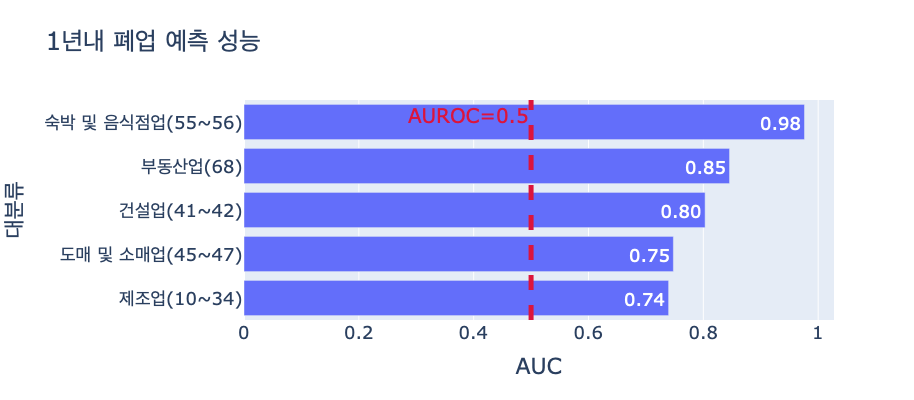

In [22]:
import plotly.express as px

tmp = (
    data_toplot
    .copy()
    .loc[lambda x: x['target']=='Closed_In_1Yr']
    .groupby(['대분류'])
    ['AUC'].mean()
    .to_frame()
    .reset_index(drop=False).sort_values(by='AUC')
)
fig = px.bar(tmp, y='대분류', x='AUC', title='1년내 폐업 예측 성능', orientation='h', text_auto='.2f')
fig.add_vline(x=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="top left",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    font=dict(size=18)
)

figure_name = 'Baseline_result_closed_in_1yr.png'
fig.write_image(FIGURE_PATH / figure_name)
fig.show()

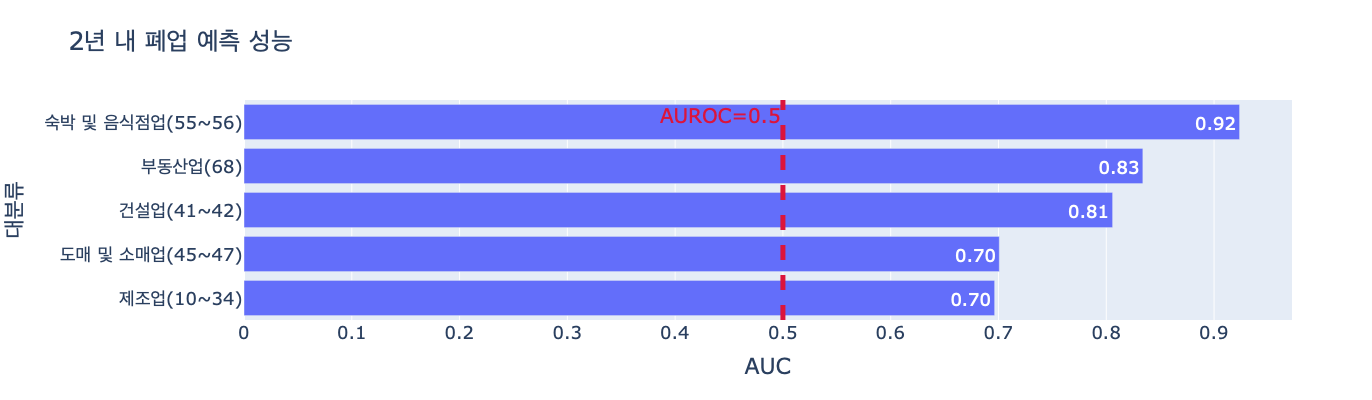

In [9]:
tmp = (
    data_toplot
    .copy()
    .loc[lambda x: x['target']=='Closed_In_2Yrs']
    .groupby(['대분류'])['AUC'].mean().to_frame().reset_index(drop=False).sort_values(by='AUC')
)
fig = px.bar(tmp, y='대분류', x='AUC', title='2년 내 폐업 예측 성능', orientation='h', text_auto='.2f')
fig.add_vline(x=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="top left",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    font=dict(size=18)
)

figure_name = 'Baseline_result_closed_in_2yrs.png'
fig.write_image(FIGURE_PATH / figure_name)
fig.show()

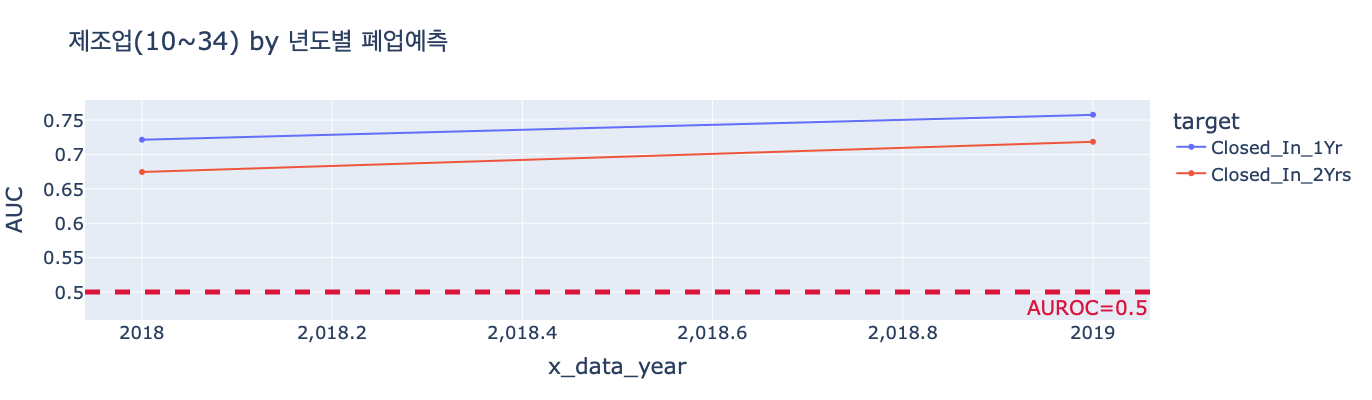

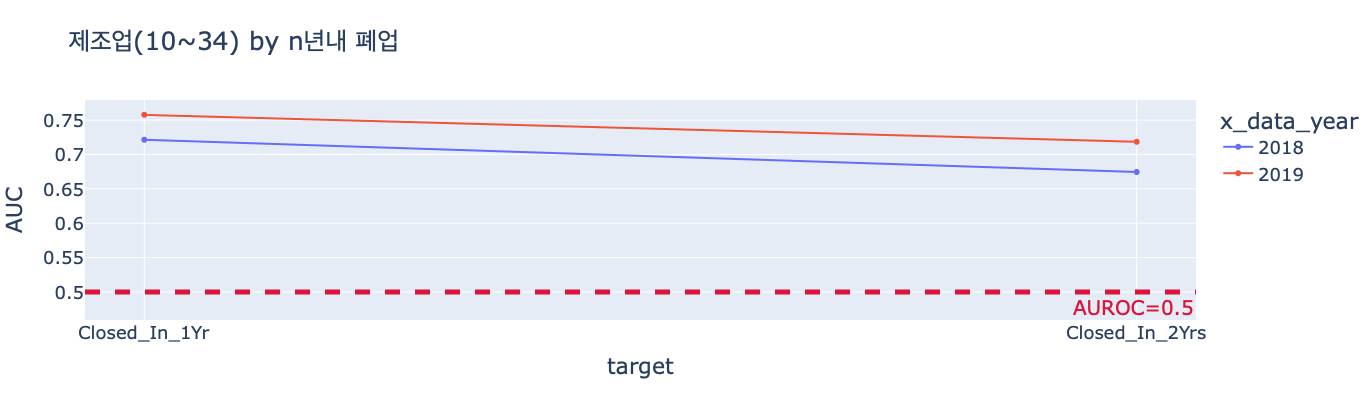

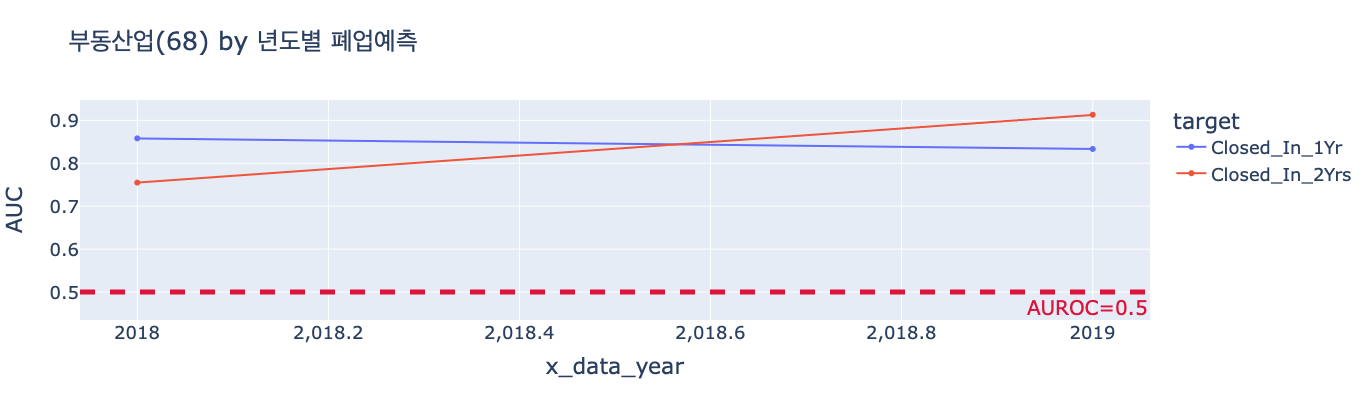

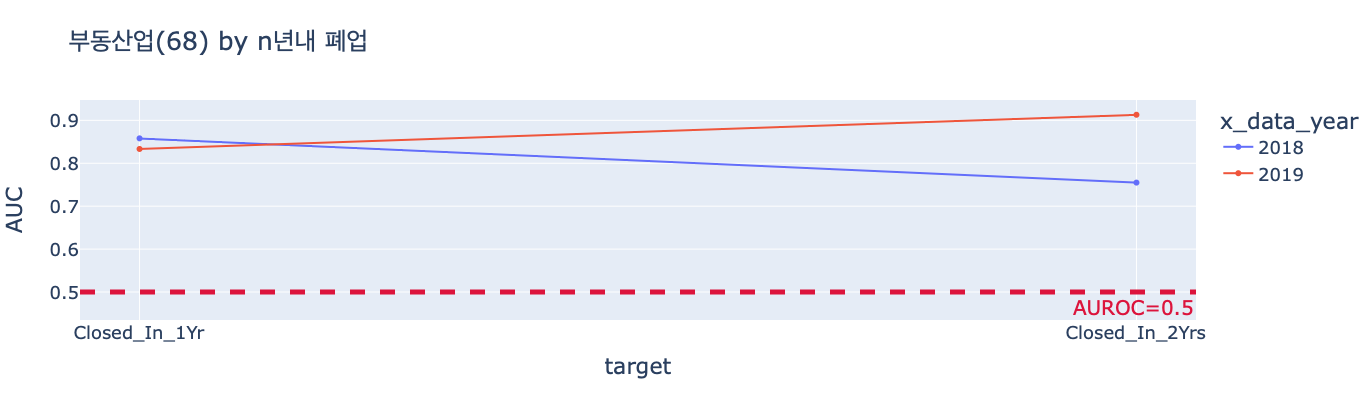

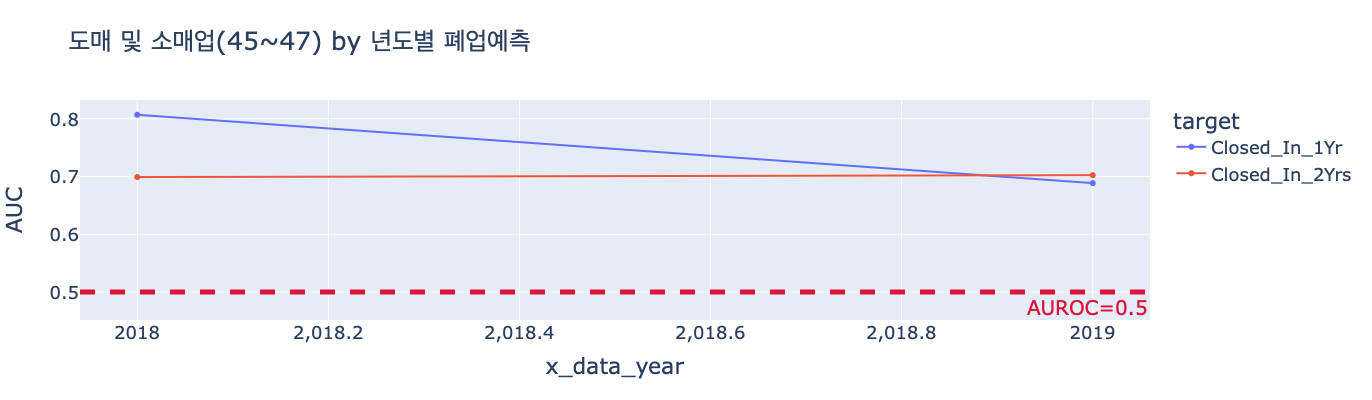

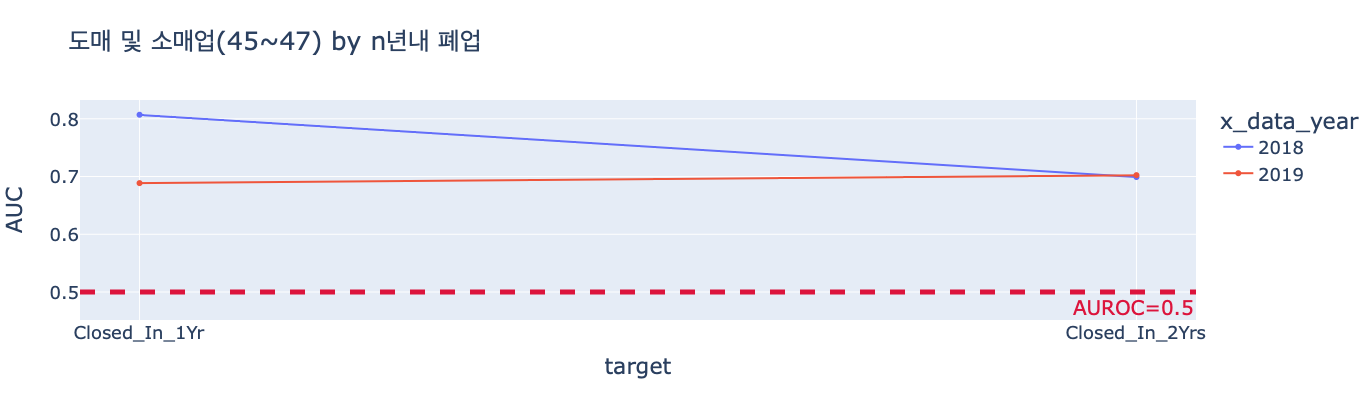

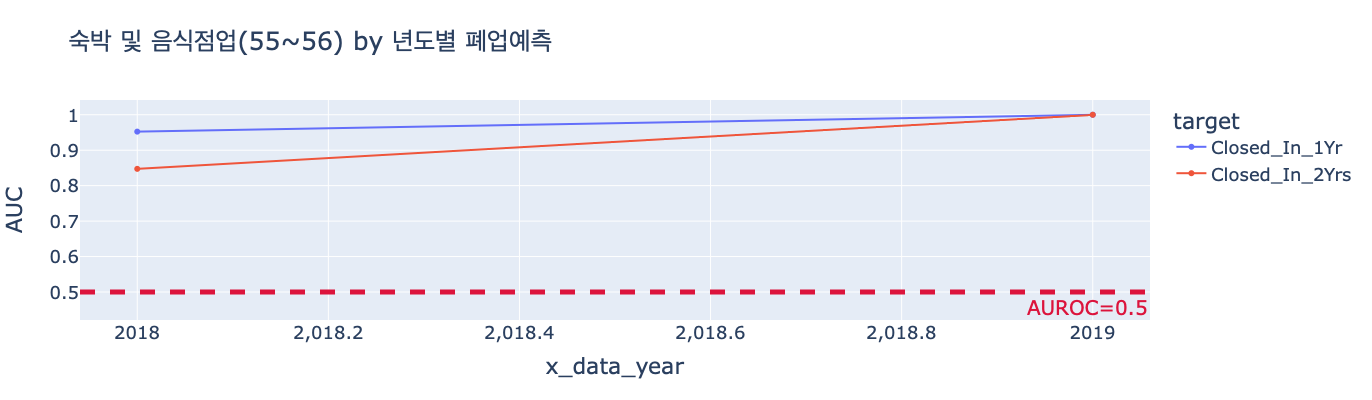

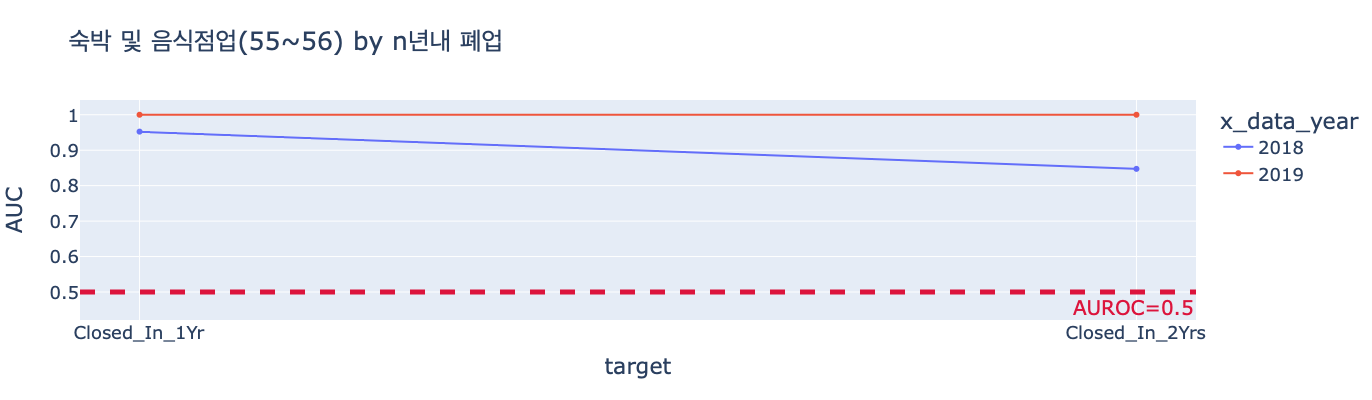

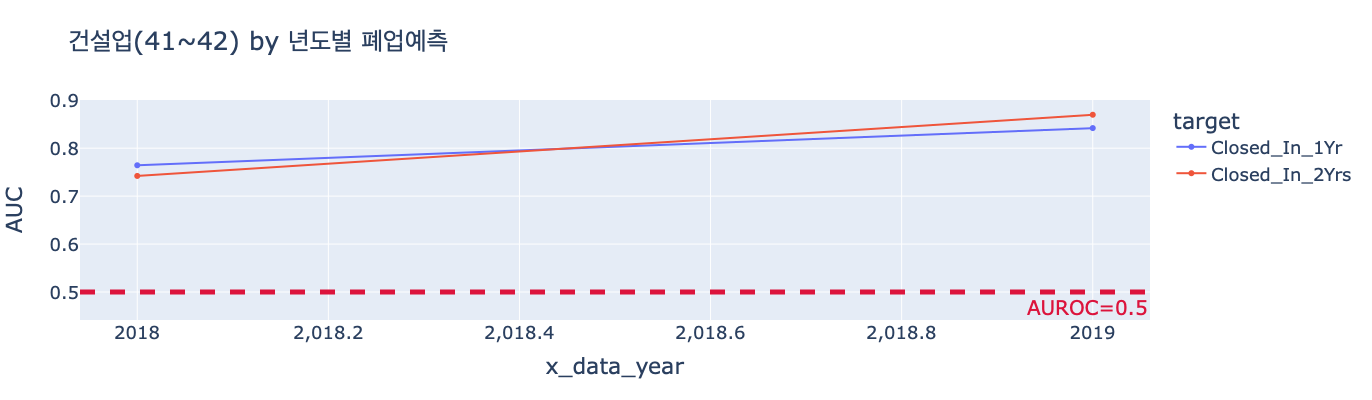

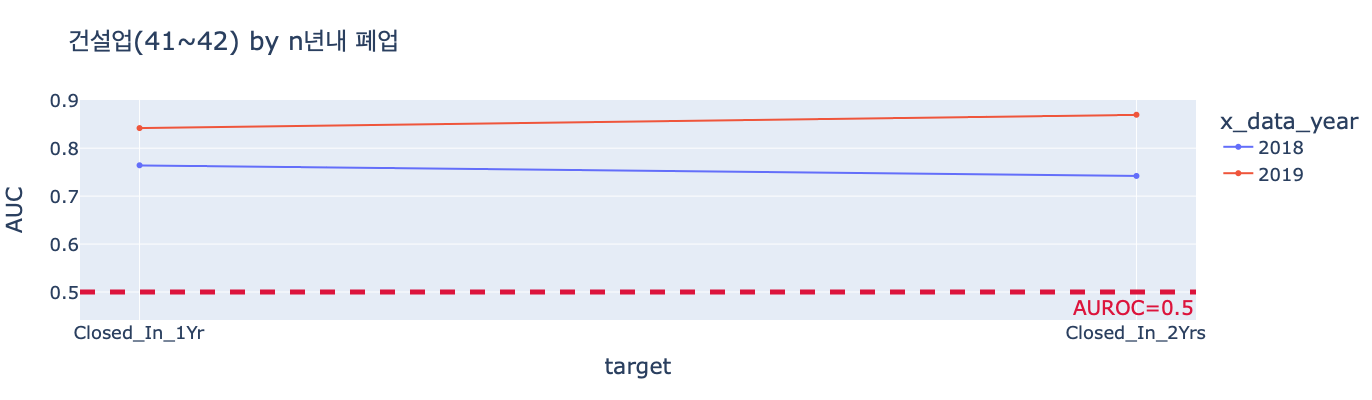

In [10]:
for sector in sectors : 
    fig = px.line(data_toplot.loc[lambda x : x['대분류']==sector],
                  x='x_data_year',
                  y='AUC',
                  color='target',
                  markers=True,
                  title=f'{sector} by 년도별 폐업예측'
                 )
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        font=dict(size=18)
        ,
    )
    fig.add_hline(y=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="bottom right",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
    figure_name = f'Baseline_result_{sector}_년도별.png'
    fig.write_image(FIGURE_PATH / figure_name)
    fig.show()

    fig = px.line(data_toplot.loc[lambda x : x['대분류']==sector],
                  x='target',
                  y='AUC',
                  color='x_data_year',
                  markers=True,
                  title=f'{sector} by n년내 폐업'
                 )
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        font=dict(size=18)
    )
    fig.add_hline(y=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="bottom right",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
    figure_name = f'Baseline_result_{sector}_n년내폐업.png'
    fig.write_image(FIGURE_PATH / figure_name)
    fig.show()

In [11]:
data_toplot = (
    exp_result
    .rename(columns={'x_data_yaer':'x_data_year'})
    .loc[lambda x : x['x_data_year']!=2022]
    .groupby(['대분류', 'x_data_year', 'target'])
    ['AUC'].max()
    .to_frame()
    .reset_index(drop=False)
    .groupby(['x_data_year', 'target'])
    ['AUC'].mean()
    .to_frame()
    .reset_index()
    .loc[lambda x : x['x_data_year']!=2020]
)
data_toplot

,x_data_year,target,AUC
0,2018,Closed_In_1Yr,0.82062
1,2018,Closed_In_2Yrs,0.74360
2,2019,Closed_In_1Yr,0.82430
3,2019,Closed_In_2Yrs,0.84070


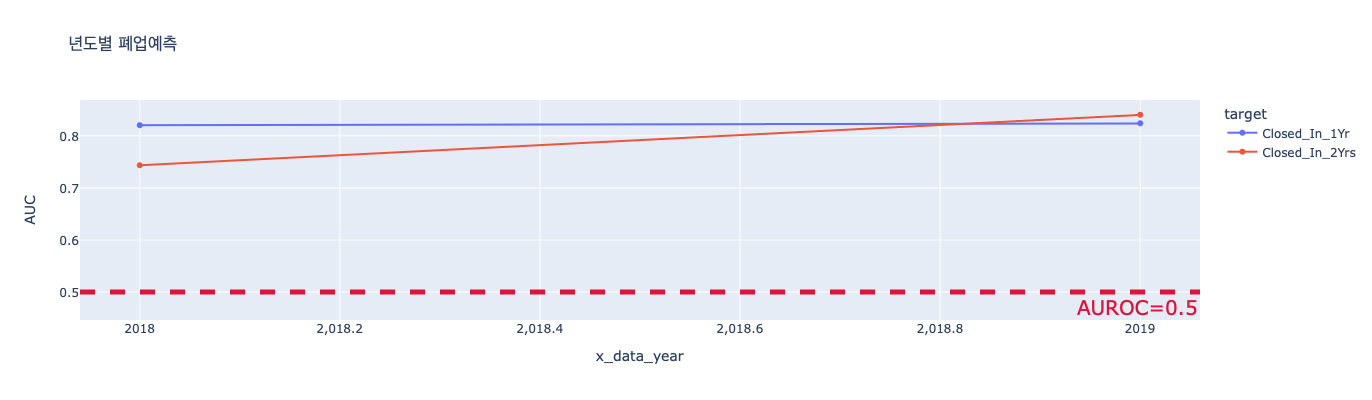

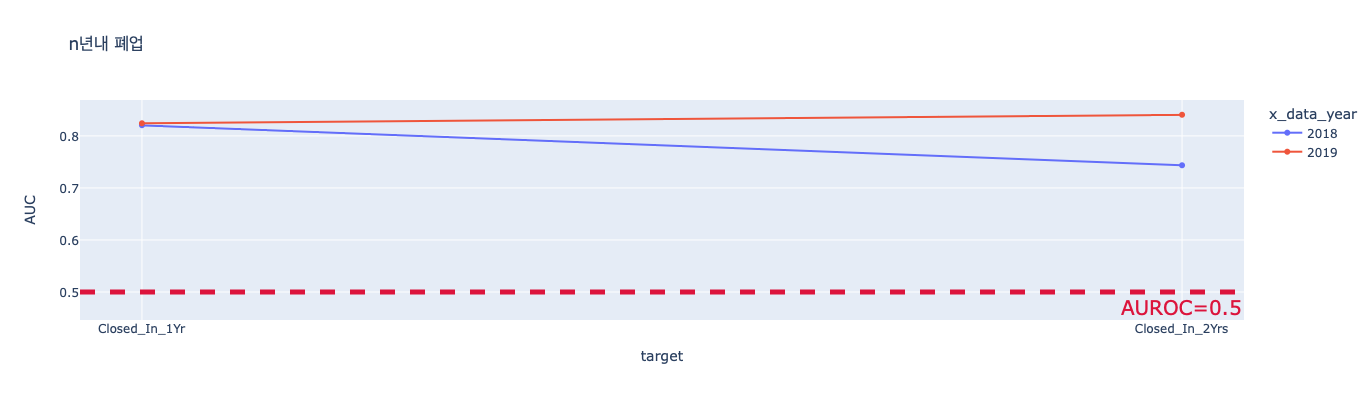

In [12]:
fig = px.line(data_toplot,
              x='x_data_year',
              y='AUC',
              color='target',
              markers=True,
              title=f'년도별 폐업예측'
             )
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.add_hline(y=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="bottom right",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
figure_name = 'Baseline_result_년도별.png'
fig.write_image(FIGURE_PATH / figure_name)
fig.show()

fig = px.line(data_toplot,
              x='target',
              y='AUC',
              color='x_data_year',
              markers=True,
              title=f'n년내 폐업'
             )
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.add_hline(y=0.5, 
              line_dash='dash', 
              line_color='crimson', 
              line_width=5,
              annotation_text="AUROC=0.5", 
              annotation_position="bottom right",
              annotation_font_color='crimson',
              annotation_font_size=20
             )
figure_name = 'Baseline_result_n년내폐업.png'
fig.write_image(FIGURE_PATH / figure_name)
fig.show()